[*********************100%%**********************]  1 of 1 completed
12:27:49 - cmdstanpy - INFO - Chain [1] start processing
12:27:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/27 [00:00<?, ?it/s]

12:27:51 - cmdstanpy - INFO - Chain [1] start processing
12:27:51 - cmdstanpy - INFO - Chain [1] done processing
12:27:51 - cmdstanpy - INFO - Chain [1] start processing
12:27:51 - cmdstanpy - INFO - Chain [1] done processing
12:27:51 - cmdstanpy - INFO - Chain [1] start processing
12:27:51 - cmdstanpy - INFO - Chain [1] done processing
12:27:51 - cmdstanpy - INFO - Chain [1] start processing
12:27:51 - cmdstanpy - INFO - Chain [1] done processing
12:27:52 - cmdstanpy - INFO - Chain [1] start processing
12:27:52 - cmdstanpy - INFO - Chain [1] done processing
12:27:52 - cmdstanpy - INFO - Chain [1] start processing
12:27:52 - cmdstanpy - INFO - Chain [1] done processing
12:27:52 - cmdstanpy - INFO - Chain [1] start processing
12:27:53 - cmdstanpy - INFO - Chain [1] done processing
12:27:53 - cmdstanpy - INFO - Chain [1] start processing
12:27:53 - cmdstanpy - INFO - Chain [1] done processing
12:27:53 - cmdstanpy - INFO - Chain [1] start processing
12:27:53 - cmdstanpy - INFO - Chain [1]

  horizon        mse      rmse       mae      mape     mdape     smape  \
0 36 days  13.510354  3.675643  3.087806  0.161875  0.127850  0.160128   
1 37 days  13.777754  3.711840  3.123894  0.163871  0.129224  0.161996   
2 38 days  14.056526  3.749203  3.154095  0.165710  0.130067  0.163551   
3 39 days  14.299807  3.781509  3.185668  0.167594  0.131331  0.165260   
4 40 days  14.367868  3.790497  3.201470  0.168529  0.131805  0.166402   

   coverage  
0  0.388060  
1  0.384368  
2  0.381147  
3  0.375962  
4  0.369992  


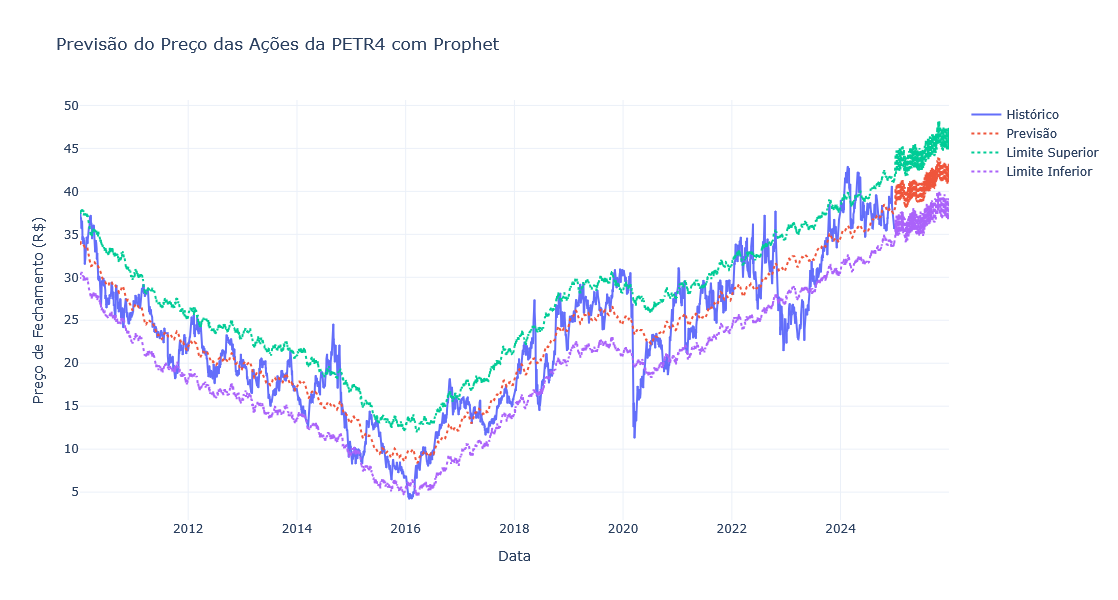

In [3]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Baixar os dados históricos da Petrobras (PETR4)
ticker = 'PETR4.SA'
dados = yf.download(ticker, start='2010-01-01', end='2025-01-01')

# Detecção de Outliers (exemplo simples com IQR)
Q1 = dados['Close'].quantile(0.25)
Q3 = dados['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = (dados['Close'] < (Q1 - 1.5 * IQR)) | (dados['Close'] > (Q3 + 1.5 * IQR))
dados['outlier'] = outliers

# Preparar os dados para o Prophet
df = dados[['Close']].reset_index()
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Criar e treinar o modelo Prophet
modelo = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
modelo.fit(df)

# Criar DataFrame de previsão para os próximos 365 dias
future = modelo.make_future_dataframe(periods=365)
forecast = modelo.predict(future)

# Avaliação do Modelo
df_cv = cross_validation(modelo, initial='365 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

# Gráfico interativo com fundo branco
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Histórico'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Previsão', line=dict(dash='dot')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Limite Superior', line=dict(dash='dot')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Limite Inferior', line=dict(dash='dot')))

fig.update_layout(
    title='Previsão do Preço das Ações da PETR4 com Prophet',
    xaxis_title='Data',
    yaxis_title='Preço de Fechamento (R$)',
    template='plotly_white',
    width=1000,  # Aumentar o tamanho do gráfico
    height=600
)

# Mostrar gráfico
fig.show()
